In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

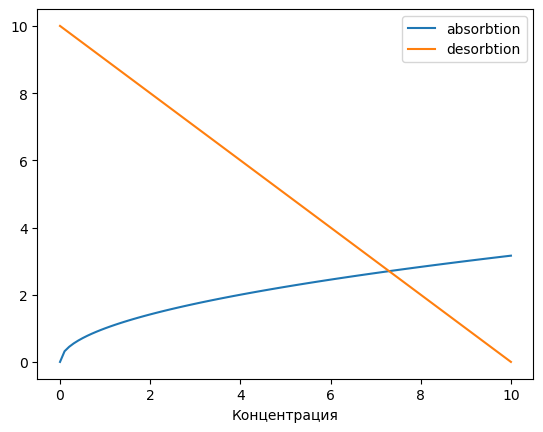

In [2]:
concentrations = np.linspace(0.0, 10, 100)
percent_adsorption = np.sqrt(concentrations)
percent_desorption = concentrations[::-1]
plt.plot(concentrations, percent_adsorption, label='absorbtion')
plt.plot(concentrations, percent_desorption, label='desorbtion')
plt.legend()
plt.xlabel('Концентрация')
conc_des = dict(zip(np.round(concentrations, 2), np.round(percent_adsorption, 3)))
conc_ad = dict(zip(np.round(concentrations, 2), np.round(percent_desorption, 3)))

In [3]:
def desorption(x):
    return np.sqrt(x)

def adsorption(x):
    return np.exp(-3 * x)

In [4]:
class Cell:
    def __init__(self):
        self.concetration_absorbate = 0.0
        self.concetration_liquid = 0.0
    
    def new_concentration():
        pass

In [5]:
SIZE_FIELD = 4
field = [[[Cell() for _ in range(SIZE_FIELD + 2)] for _ in range(SIZE_FIELD + 2)] for _ in range(SIZE_FIELD + 2)]
STEP_ADSORBER = 2

list_random_choise_x_z = [-1, 0, 1]
list_random_choise_y = [1]

In [6]:
# def randomize_direction():
#     return rnd.choice(list_random_choise_x_z)
# print(randomize_direction())

In [7]:
#делаем рандомное направление
def randomize_direction():
    return rnd.randint(list_random_choise_x_z)


def change_concentration_from_liq(coords_from, coords_to):
    
    delta = field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_liquid - field[coords_to[0]][coords_to[1]][coords_to[2]].concetration_absorbate
        
    ability = adsorption(field[coords_to[0]][coords_to[1]][coords_to[2]].concetration_absorbate)
    
    to_refresh = min(delta * 0.5,
                     ability,
                     desorption(field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_liquid))
    
    field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_liquid -= to_refresh
    
    field[coords_to[0]][coords_to[1]][coords_to[2]].concetration_absorbate += to_refresh


def change_concentration_from_abs(coords_from, coords_to):
    
    to_rnd = rnd.choice(list_random_choise_x_z)
    
    delta = field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_absorbate - field[coords_to[0]][coords_to[1] + to_rnd][coords_to[2] + to_rnd].concetration_absorbate
        
    ability = adsorption(field[coords_to[0]][coords_to[1] + to_rnd][coords_to[2] + to_rnd].concetration_absorbate)
    
    to_refresh = min(delta * 0.5,
                     ability,
                     desorption(field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_absorbate))
    
    field[coords_from[0]][coords_from[1]][coords_from[2]].concetration_absorbate -= to_refresh
    
    field[coords_to[0]][coords_to[1] + to_rnd][coords_to[2] + to_rnd].concetration_absorbate += to_refresh

In [8]:
# randomize_direction()
# change_concentration_from_liq(0, 0)

# for i in range(3):
#     change_concentration_from_abs(i, i + 1)

In [9]:
n = 1
while field[SIZE_FIELD - 1][SIZE_FIELD - 1][SIZE_FIELD - 1].concetration_liquid ==0:
    
    n += 1
    
    for i in range(1, SIZE_FIELD + 1, 1):
        for j in range(1, SIZE_FIELD + 1, 1):
            field[i][1][j].concetration_liquid = 0.1

    
    for y in range(1, SIZE_FIELD + 1, 1):
        for x in range(1, SIZE_FIELD + 1, 1):
            for z in range(1, SIZE_FIELD + 1, 1):
                change_concentration_from_liq([x, y, z], [x, y, z])
        
    if n + STEP_ADSORBER < SIZE_FIELD:
        step_ads = n + STEP_ADSORBER
    else:
        step_ads = SIZE_FIELD
        
    for y in range(1, step_ads, 1):
        for x in range(1, step_ads, 1):
            for z in range(1, step_ads, 1):
                change_concentration_from_abs([x, y, z], [x, y + 1, z])
                print(f"ads_{x}_{y} {field[x][y][z].concetration_absorbate}")
                print(f"liq_{x}_{y} {field[x][y][z].concetration_liquid}")
        
#     print([x.concetration_absorbate for x in field])
#     print([x.concetration_liquid for x in field])
    
    for x in range(1, SIZE_FIELD + 1, 1):
        for y in range(1, SIZE_FIELD + 1, 1):
            field[-x][-y][-z].concetration_liquid = field[-x][-y - 1][-z].concetration_liquid
            field[-x][-y][-z].concetration_absorbate = field[-x][-y - 1][-z].concetration_absorbate
        
#     print(f"-------- {n} -------")
#     print([x.concetration_absorbate for x in field])
#     print([x.concetration_liquid for x in field])

ads_1_1 0.025
liq_1_1 0.05
ads_1_1 0.037500000000000006
liq_1_1 0.05
ads_1_1 0.025
liq_1_1 0.05
ads_2_1 0.025
liq_2_1 0.05
ads_2_1 0.025
liq_2_1 0.05
ads_2_1 0.025
liq_2_1 0.05
ads_3_1 0.025
liq_3_1 0.05
ads_3_1 0.025
liq_3_1 0.05
ads_3_1 0.025
liq_3_1 0.05
ads_1_2 0.0
liq_1_2 0.0
ads_1_2 0.0
liq_1_2 0.0
ads_1_2 0.0
liq_1_2 0.0
ads_2_2 0.0
liq_2_2 0.0
ads_2_2 0.0125
liq_2_2 0.0
ads_2_2 0.00625
liq_2_2 0.0
ads_3_2 0.0
liq_3_2 0.0
ads_3_2 0.0
liq_3_2 0.0
ads_3_2 0.0125
liq_3_2 0.0
ads_1_3 0.0
liq_1_3 0.0
ads_1_3 0.0
liq_1_3 0.0
ads_1_3 0.0
liq_1_3 0.0
ads_2_3 0.0
liq_2_3 0.0
ads_2_3 0.0125
liq_2_3 0.0
ads_2_3 0.00625
liq_2_3 0.0
ads_3_3 0.0
liq_3_3 0.0
ads_3_3 0.0
liq_3_3 0.0
ads_3_3 0.0125
liq_3_3 0.0
ads_1_1 0.034375
liq_1_1 0.06875
ads_1_1 0.034375
liq_1_1 0.06875
ads_1_1 0.0375
liq_1_1 0.0625
ads_2_1 0.0328125
liq_2_1 0.0625
ads_2_1 0.04765625
liq_2_1 0.0625
ads_2_1 0.0375
liq_2_1 0.0625
ads_3_1 0.03125
liq_3_1 0.0625
ads_3_1 0.034375
liq_3_1 0.0625
ads_3_1 0.03125
liq_3_1 0.0625
ads

In [10]:
print(field[0][0][0].concetration_absorbate)
print(field[0][0][0].concetration_liquid)

0.0
0.0


In [11]:
# for x in range(SIZE_FIELD):
#     for y in range(SIZE_FIELD):
#         print(f"abs {x} {field[x][y].concetration_absorbate}")
#         print(f"liq {x} {field[x][y].concetration_liquid}")

In [12]:
# print([field[x][y].concetration_absorbate for x in range(len(field[:][0])) for y in range(len(field[x][:]))])
# print([field[x][y].concetration_liquid for x in range(len(field[:][0])) for y in range(len(field[x][:]))])